# Proyecto OCR

#
**Librerias**

In [42]:
import fitz
from PIL import Image
import requests
from flask import Flask, request
from io import BytesIO
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
import pyodbc
print(pyodbc.drivers())
from transformers import pipeline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from openai import OpenAI
import json

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


#
**Extraer textos de PDFs**

In [16]:
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

pdf_text = extract_text_from_pdf(r"C:\Users\oswal\Desktop\EpicGames\IP Partner Licensing Agreement.pdf")
print(pdf_text)

 
IP Partner Licensing Agreement
 
ADDENDUM TO ENGAGEMENT PROGRAM PAYOUT TERMS AND ADDITIONAL FORTNITE ISLAND 
CREATOR RULES FOR CERTAIN CREATOR CONTENT
These terms govern Creator use of IP Partnership Program Assets licensed to Creators by IP Partnership 
Program Licensors (“Licensor” or “Licensor(s)”) and Epic as set forth herein and pursuant to any additional IP 
Partnership Brand Policies. When creating islands and using assets provided as part of the IP Partnership 
Program (“IP Program Assets”), you must agree to and comply with the terms below, In addition to complying 
with the Engagement Program Payout Terms, Creator Content Rules, Epic Content Guidelines, and Epic 
Community Rules (collectively the “Epic Policies”).
CONTENT RULES & amp; GUIDELINES
1. 
Fortnite content you create using assets provided as part of the IP Program Assets must follow these rules:
Third Party Content. Islands you create that use IP Program Assets must not include any other 
third-party materials tha

#
**Extraer datos de imagenes**

**Imagen de ejemplo**

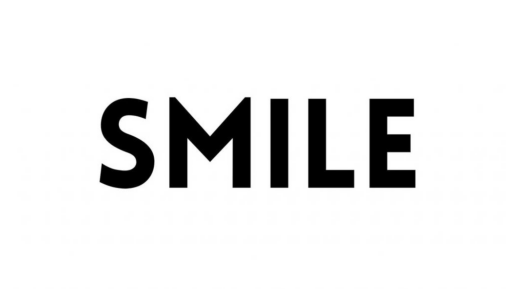

In [17]:
image_2_show = mpimg.imread(r"C:\Users\oswal\text_image_orc.jpg")
plt.imshow(image_2_show)
plt.axis('off')
plt.show()

In [18]:
def extract_text_from_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

image_text = extract_text_from_image(r"C:\Users\oswal\text_image_orc.jpg")
print(f"La imagen dice: {image_text}")

La imagen dice: SMILE



#
**Uso de GPU/CPU**

In [15]:
device = 0 if torch.cuda.is_available() else -1
print(f"Usando {'GPU' if device == 0 else 'CPU'}")

Usando GPU


#
**Modelo de Zero Shot Image Classification - Facebook**

**Imagen de acuerdo de pago**

In [46]:
image_2_show_2 = mpimg.imread(r"")
plt.imshow(image_2_show_2)
plt.axis('off')
plt.show()

AttributeError: 'str' object has no attribute 'read'

#
**Ejemplos de funcionalidad**

In [28]:
def clasificar_imagen_zero_shot(ruta_imagen, etiquetas=None):
    if etiquetas is None:
        etiquetas = [
            "Contrato",
            "Factura",
            "Recibo",
            "Identificación personal",
            "Informe",
            "Currículum / Hoja de vida",
            "Certificado",
            "Licencia o permiso",
            "Correspondencia (cartas, emails)",
            "Documentación legal",
            "Documentación técnica",
            "Manual o guía",
            "Proyecto",
            "Planificación / Agenda",
            "Otros"
        ]

    classifier = pipeline("zero-shot-image-classification", model="facebook/metaclip-b16-fullcc2.5b")
    imagen = Image.open(ruta_imagen)
    resultado = classifier(imagen, candidate_labels=etiquetas)
    return resultado

In [ ]:
ruta = r"C:\Users\oswal\Pictures\Screenshots\Imagen_de_acuerdo_legal.png"
resultado = clasificar_imagen_zero_shot(ruta)
print(resultado)

Device set to use cuda:0


[{'score': 0.26988929510116577, 'label': 'Informe'}, {'score': 0.1524006575345993, 'label': 'Licencia o permiso'}, {'score': 0.12430041283369064, 'label': 'Planificación / Agenda'}, {'score': 0.09947247803211212, 'label': 'Correspondencia (cartas, emails)'}, {'score': 0.09391747415065765, 'label': 'Certificado'}, {'score': 0.07798025757074356, 'label': 'Otros'}, {'score': 0.05701035261154175, 'label': 'Identificación personal'}, {'score': 0.052872080355882645, 'label': 'Documentación legal'}, {'score': 0.023692715913057327, 'label': 'Contrato'}, {'score': 0.019794495776295662, 'label': 'Proyecto'}, {'score': 0.015970317646861076, 'label': 'Factura'}, {'score': 0.004840221256017685, 'label': 'Manual o guía'}, {'score': 0.004246979020535946, 'label': 'Recibo'}, {'score': 0.003528667613863945, 'label': 'Documentación técnica'}, {'score': 8.352271834155545e-05, 'label': 'Currículum / Hoja de vida'}]


In [29]:
ruta = r"C:\Users\oswal\Pictures\Screenshots\acta.png"
resultado = clasificar_imagen_zero_shot(ruta)
print(resultado)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\oswal\\Pictures\\Screenshots\\acta.png'

In [ ]:
ruta = r"C:\Users\oswal\Pictures\Screenshots\asamblea.png"
resultado = clasificar_imagen_zero_shot(ruta)
print(resultado)

Device set to use cuda:0


[{'score': 0.39130517840385437, 'label': 'Certificado'}, {'score': 0.2850024700164795, 'label': 'Identificación personal'}, {'score': 0.07287680357694626, 'label': 'Currículum / Hoja de vida'}, {'score': 0.04739687591791153, 'label': 'Documentación legal'}, {'score': 0.04543513432145119, 'label': 'Licencia o permiso'}, {'score': 0.04031430557370186, 'label': 'Planificación / Agenda'}, {'score': 0.03296715021133423, 'label': 'Correspondencia (cartas, emails)'}, {'score': 0.02226545847952366, 'label': 'Factura'}, {'score': 0.018335478380322456, 'label': 'Contrato'}, {'score': 0.016390549018979073, 'label': 'Documentación técnica'}, {'score': 0.009871911257505417, 'label': 'Manual o guía'}, {'score': 0.00877527054399252, 'label': 'Informe'}, {'score': 0.005380651447921991, 'label': 'Proyecto'}, {'score': 0.003487340407446027, 'label': 'Otros'}, {'score': 0.00019535538740456104, 'label': 'Recibo'}]


In [ ]:
ruta = r"C:\Users\oswal\Pictures\Screenshots\certificado.png"
resultado = clasificar_imagen_zero_shot(ruta)
print(resultado)

Device set to use cuda:0


[{'score': 0.6973485946655273, 'label': 'Certificado'}, {'score': 0.0761999636888504, 'label': 'Correspondencia (cartas, emails)'}, {'score': 0.05635397508740425, 'label': 'Identificación personal'}, {'score': 0.04000258818268776, 'label': 'Planificación / Agenda'}, {'score': 0.03295648843050003, 'label': 'Documentación legal'}, {'score': 0.026298366487026215, 'label': 'Licencia o permiso'}, {'score': 0.019336316734552383, 'label': 'Informe'}, {'score': 0.011611436493694782, 'label': 'Contrato'}, {'score': 0.010885155759751797, 'label': 'Documentación técnica'}, {'score': 0.00825097132474184, 'label': 'Currículum / Hoja de vida'}, {'score': 0.006907053757458925, 'label': 'Proyecto'}, {'score': 0.006298427004367113, 'label': 'Factura'}, {'score': 0.0048196385614573956, 'label': 'Manual o guía'}, {'score': 0.002246523043140769, 'label': 'Otros'}, {'score': 0.0004844354116357863, 'label': 'Recibo'}]


In [ ]:
ruta = r"C:\Users\oswal\Pictures\Screenshots\onapi.png"
resultado = clasificar_imagen_zero_shot(ruta)
print(resultado)

Device set to use cuda:0


[{'score': 0.7577754259109497, 'label': 'Certificado'}, {'score': 0.06882848590612411, 'label': 'Documentación legal'}, {'score': 0.06836558133363724, 'label': 'Identificación personal'}, {'score': 0.03107578307390213, 'label': 'Currículum / Hoja de vida'}, {'score': 0.02119135670363903, 'label': 'Documentación técnica'}, {'score': 0.01235567033290863, 'label': 'Manual o guía'}, {'score': 0.010627185925841331, 'label': 'Licencia o permiso'}, {'score': 0.007925642654299736, 'label': 'Correspondencia (cartas, emails)'}, {'score': 0.007017097435891628, 'label': 'Planificación / Agenda'}, {'score': 0.006946837529540062, 'label': 'Contrato'}, {'score': 0.0035479485522955656, 'label': 'Factura'}, {'score': 0.0023356499150395393, 'label': 'Informe'}, {'score': 0.0011916551738977432, 'label': 'Proyecto'}, {'score': 0.0007666920428164303, 'label': 'Otros'}, {'score': 4.901859210804105e-05, 'label': 'Recibo'}]


**Función de clasificar documentos**

In [30]:
def classify_document(text, categories):
    """
    Clasifica el texto de un documento en una categoría usando clasificación zero-shot.
    
    Args:
        text (str): Texto del documento a clasificar.
        categories (list): Lista de categorías posibles.
    
    Returns:
        str: Categoría predicha para el documento.
    """

    result = classifier(text, candidate_labels=categories)
    return result["labels"][0]


In [41]:
# Configuración de Deepseek
client = OpenAI(
    api_key="sk-1c61d586aa734348952523cf4516d3ac",  # Reemplaza con tu API key
    base_url="https://api.deepseek.com"
)

def buscar_documentos_inteligente(consulta_usuario):
    """
    Sistema de búsqueda inteligente usando Deepseek AI
    
    Args:
        consulta_usuario (str): Consulta en lenguaje natural del usuario
        
    Returns:
        list: Lista de documentos encontrados
    """
    
    # Obtener categorías de la base de datos
    categorias = get_categories_from_db()
    
    # Prompt para que la IA genere parámetros de búsqueda
    prompt = f"""
Eres un asistente que ayuda a buscar documentos en una base de datos.

Categorías disponibles: {', '.join(categorias)}

Consulta del usuario: "{consulta_usuario}"

Analiza la consulta y genera parámetros de búsqueda en formato JSON con esta estructura:
{{
    "categoria": "nombre de categoría o null si no se especifica",
    "fecha_desde": "YYYY-MM-DD o null",
    "fecha_hasta": "YYYY-MM-DD o null",
    "palabras_clave": ["palabra1", "palabra2"] o [],
    "extension": ".pdf, .jpg, .png o null",
    "explicacion": "breve explicación de lo que entendiste"
}}

Responde SOLO con el JSON, sin texto adicional.
"""
    
    try:
        # Llamada a Deepseek
        response = client.chat.completions.create(
            model="deepseek-chat",
            messages=[
                {"role": "system", "content": "Eres un asistente experto en búsqueda de documentos."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,  # Baja temperatura para respuestas más precisas
            max_tokens=500
        )
        
        # Extraer respuesta
        respuesta_ia = response.choices[0].message.content
        
        # Parsear JSON
        parametros = json.loads(respuesta_ia)
        
        print(f"\n🤖 IA entendió: {parametros['explicacion']}")
        print(f"📋 Parámetros de búsqueda: {parametros}\n")
        
        # Ejecutar búsqueda en la base de datos
        resultados = ejecutar_busqueda_bd(parametros)
        
        return resultados
        
    except json.JSONDecodeError:
        print("Error: La IA no devolvió un JSON válido")
        print(f"Respuesta: {respuesta_ia}")
        return []
    except Exception as e:
        print(f"Error en búsqueda inteligente: {e}")
        return []


def ejecutar_busqueda_bd(parametros):
    """
    Ejecuta la búsqueda en la base de datos según los parámetros
    
    Args:
        parametros (dict): Parámetros extraídos por la IA
        
    Returns:
        list: Resultados de la búsqueda
    """
    cursor = connection.cursor()
    
    # Construir query SQL dinámicamente
    query = """
        SELECT 
            d.DocumentID,
            d.FilePath,
            d.Uploaded,
            c.CategoryName,
            d.ExtractedText
        FROM dbo.Documents d
        LEFT JOIN dbo.Categories c ON d.CategoryID = c.CategoryID
        WHERE 1=1
    """
    
    params = []
    
    # Filtro por categoría
    if parametros.get('categoria'):
        query += " AND c.CategoryName = ?"
        params.append(parametros['categoria'])
    
    # Filtro por fecha desde
    if parametros.get('fecha_desde'):
        query += " AND d.Uploaded >= ?"
        params.append(parametros['fecha_desde'])
    
    # Filtro por fecha hasta
    if parametros.get('fecha_hasta'):
        query += " AND d.Uploaded <= ?"
        params.append(parametros['fecha_hasta'])
    
    # Filtro por palabras clave en el texto extraído
    if parametros.get('palabras_clave'):
        for palabra in parametros['palabras_clave']:
            query += " AND d.ExtractedText LIKE ?"
            params.append(f"%{palabra}%")
    
    # Filtro por extensión de archivo
    if parametros.get('extension'):
        query += " AND d.FilePath LIKE ?"
        params.append(f"%{parametros['extension']}")
    
    # Ejecutar query
    cursor.execute(query, params)
    resultados = cursor.fetchall()
    
    # Formatear resultados
    documentos = []
    for row in resultados:
        documentos.append({
            'DocumentID': row[0],
            'FilePath': row[1],
            'Uploaded': row[2],
            'CategoryName': row[3],
            'ExtractedText': row[4][:200] + "..." if row[4] else ""  # Primeros 200 caracteres
        })
    
    return documentos


def mostrar_resultados(resultados):
    """
    Muestra los resultados de forma legible
    
    Args:
        resultados (list): Lista de documentos encontrados
    """
    if not resultados:
        print("❌ No se encontraron documentos que coincidan con tu búsqueda.")
        return
    
    print(f"\n✅ Se encontraron {len(resultados)} documento(s):\n")
    
    for i, doc in enumerate(resultados, 1):
        print(f"{i}. 📄 {doc['FilePath']}")
        print(f"   📂 Categoría: {doc['CategoryName'] or 'Sin categoría'}")
        print(f"   📅 Fecha: {doc['Uploaded']}")
        print(f"   📝 Extracto: {doc['ExtractedText']}")
        print(f"   🔗 Ruta: {doc['FilePath']}\n")


# Función principal de demostración
def demo_busqueda_inteligente():
    """
    Función de demostración del sistema de búsqueda
    """
    print("=" * 60)
    print("🔍 SISTEMA DE BÚSQUEDA INTELIGENTE DE DOCUMENTOS")
    print("=" * 60)
    
    ejemplos = [
        "Busca todos los contratos del 2024",
        "Encuentra documentos legales sobre propiedad intelectual",
        "Dame PDFs subidos en marzo",
        "Busca facturas del cliente Epic Games"
    ]
    
    print("\n💡 Ejemplos de consultas que puedes hacer:")
    for ejemplo in ejemplos:
        print(f"   • {ejemplo}")
    
    print("\n" + "-" * 60 + "\n")
    
    # Búsqueda interactiva
    while True:
        consulta = input("🔎 Escribe tu búsqueda (o 'salir' para terminar): ").strip()
        
        if consulta.lower() in ['salir', 'exit', 'quit']:
            print("\n👋 ¡Hasta luego!")
            break
        
        if not consulta:
            continue
        
        # Ejecutar búsqueda
        resultados = buscar_documentos_inteligente(consulta)
        mostrar_resultados(resultados)
        print("-" * 60 + "\n")


# Para usar en tu notebook:
if __name__ == "__main__":
    # Ejemplo de uso simple
    resultados = buscar_documentos_inteligente("Busca contratos de Epic Games")
    mostrar_resultados(resultados)
    
    # O usar el modo interactivo
    # demo_busqueda_inteligente()

Error en búsqueda inteligente: Error code: 402 - {'error': {'message': 'Insufficient Balance', 'type': 'unknown_error', 'param': None, 'code': 'invalid_request_error'}}
❌ No se encontraron documentos que coincidan con tu búsqueda.


In [40]:
# Configurar tu API key
client = OpenAI(
    api_key="sk-1c61d586aa734348952523cf4516d3ac",  # 🔑 Reemplaza esto
    base_url="https://api.deepseek.com"
)

# Ejemplo de búsqueda
resultados = buscar_documentos_inteligente("Busca documentos PDF del 2025")
mostrar_resultados(resultados)

Error en búsqueda inteligente: Error code: 402 - {'error': {'message': 'Insufficient Balance', 'type': 'unknown_error', 'param': None, 'code': 'invalid_request_error'}}
❌ No se encontraron documentos que coincidan con tu búsqueda.
